In [51]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [52]:
csv_file = []

DATA SCRAPING AND CRAWLING

In [53]:
with open('textfile.txt', 'w', encoding='utf-8') as file:

    for i in range(1,11):
        url = "https://kissanime.com.ru/AnimeListOnline/Trending?page="+str(i)
        print(url)
        html = requests.get(url)
        soup = BeautifulSoup(html.content, 'html.parser')

        a_name = soup.find_all('a',class_="item_movies_link jtitle")
        
        anime_name_link = [link['href'] for link in a_name]

        for url in anime_name_link:
            link_html = requests.get(url)
            link_soup = BeautifulSoup(link_html.content, 'html.parser')

            link_results = link_soup.find(id='leftside')

            anime_name=link_results.find("strong" ,class_="bigChar jtitle")
            file.write(f'Name = {anime_name.text}\n')
            # print(anime_name.text)

            alt_name = link_results.find("a" ,class_="dotUnder")
            file.write(f'Altname = {alt_name.text}\n')
            # print(alt_name.text)

            aa = link_soup.find(class_="static_single")
            two = aa.find_all("p",class_="item_static")

            Condition=two[0].text.split(': ')[1]
            file.write(f'Condition = {Condition}\n')
            # print(Condition)

            Views = two[1].text.split(': ')[1]
            file.write(f'No_of_views = {Views}\n')
            # print(Views)

            ab = link_soup.find(class_="summary")
            summary = ab.find('p')
            file.write(f'About this anime : {summary.text}\n')
            # print(summary.text)

            ac = link_soup.find(class_="listing listing8515 full")
            episo = ac.find("h3")
            
            if episo:
                Latest_episode = episo.text.split(' ')[-1]
                file.write(f'Latest_episode = {Latest_episode}\n \n')
            else:
                Latest_episode = 0
                file.write(f'Latest_episode = {Latest_episode}\n \n')

            csv_file.append([anime_name.text, Condition, Views, Latest_episode])

https://kissanime.com.ru/AnimeListOnline/Trending?page=1
https://kissanime.com.ru/AnimeListOnline/Trending?page=2
https://kissanime.com.ru/AnimeListOnline/Trending?page=3
https://kissanime.com.ru/AnimeListOnline/Trending?page=4
https://kissanime.com.ru/AnimeListOnline/Trending?page=5
https://kissanime.com.ru/AnimeListOnline/Trending?page=6
https://kissanime.com.ru/AnimeListOnline/Trending?page=7
https://kissanime.com.ru/AnimeListOnline/Trending?page=8
https://kissanime.com.ru/AnimeListOnline/Trending?page=9
https://kissanime.com.ru/AnimeListOnline/Trending?page=10


In [57]:
df = pd.DataFrame(csv_file, columns=['Anime Name', 'Condition', 'Views', 'Latest Episode'])

df.to_csv('anime_data.csv', index=False)

DATA CLEANING

In [58]:
dff = pd.read_csv("anime_data.csv")
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,621,511",012\n
1,My Hero Academia Season 6,Ongoing,"5,550,813",024\n
2,One Piece,Ongoing,"400,595,347",1054\n
3,SPY x FAMILY,Completed,"5,744,564",012\n
4,Attack on Titan Final Season,Completed,"16,527,856",016\n


In [59]:
dff['Latest Episode'] = dff['Latest Episode'].replace('\n', '', regex=True)
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,621,511",012
1,My Hero Academia Season 6,Ongoing,"5,550,813",024
2,One Piece,Ongoing,"400,595,347",1054
3,SPY x FAMILY,Completed,"5,744,564",012
4,Attack on Titan Final Season,Completed,"16,527,856",016


Some of the elements in the Latest Episode didnt not contain digits but rather words.
so in the code below we removed the rows containing such non-digits.

In [60]:
mask = dff['Latest Episode'].str.isdigit()
dff = dff[mask]
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,"6,621,511",012
1,My Hero Academia Season 6,Ongoing,"5,550,813",024
2,One Piece,Ongoing,"400,595,347",1054
3,SPY x FAMILY,Completed,"5,744,564",012
4,Attack on Titan Final Season,Completed,"16,527,856",016


Converted the views and latest Episode to floating numbers(preprocessing)

In [61]:
dff['Views'] = dff['Views'].str.replace(',', '').astype(float)
dff['Latest Episode'] = dff['Latest Episode'].astype(float)

dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,Completed,6621511.0,12.0
1,My Hero Academia Season 6,Ongoing,5550813.0,24.0
2,One Piece,Ongoing,400595347.0,1054.0
3,SPY x FAMILY,Completed,5744564.0,12.0
4,Attack on Titan Final Season,Completed,16527856.0,16.0


Ongoing = 1 .........and........... Completed =0

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col = ['Condition']
for i in col:
    dff[i]=le.fit_transform(dff[i])
dff.head()

,Anime Name,Condition,Views,Latest Episode
0,Chainsaw Man,0,6621511.0,12.0
1,My Hero Academia Season 6,1,5550813.0,24.0
2,One Piece,1,400595347.0,1054.0
3,SPY x FAMILY,0,5744564.0,12.0
4,Attack on Titan Final Season,0,16527856.0,16.0


DATA VISUALATION

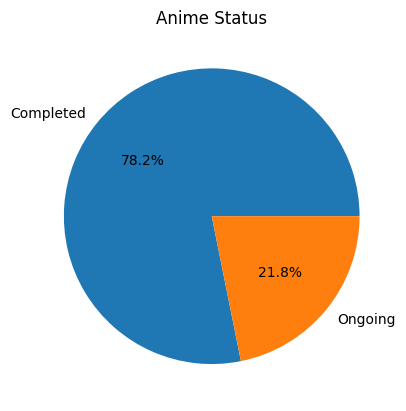

In [63]:
import matplotlib.pyplot as plt

condition_counts = dff.groupby('Condition')['Anime Name'].count()
plt.pie(condition_counts.values, labels=['Completed','Ongoing'], autopct='%1.1f%%')
plt.title('Anime Status')
plt.show()


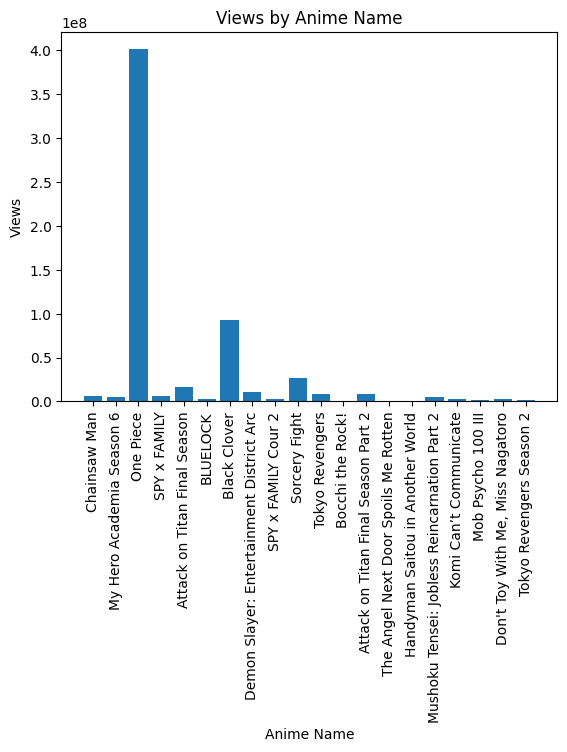

In [64]:
dff['Views'] = dff['Views'].astype(int)
df_graph = dff.head(20)
plt.bar(df_graph['Anime Name'], df_graph['Views'])
plt.xticks(rotation=90)
plt.xlabel('Anime Name')
plt.ylabel('Views')
plt.title('Views by Anime Name')

plt.show()

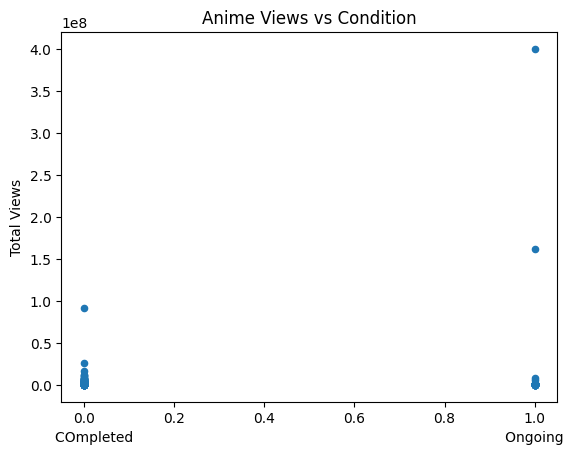

In [73]:
dff.head(200).plot(kind='scatter', x='Condition', y='Views')

plt.xlabel('COmpleted                                                                                     Ongoing')
plt.ylabel('Total Views')
plt.title('Anime Views vs Condition')

plt.show()

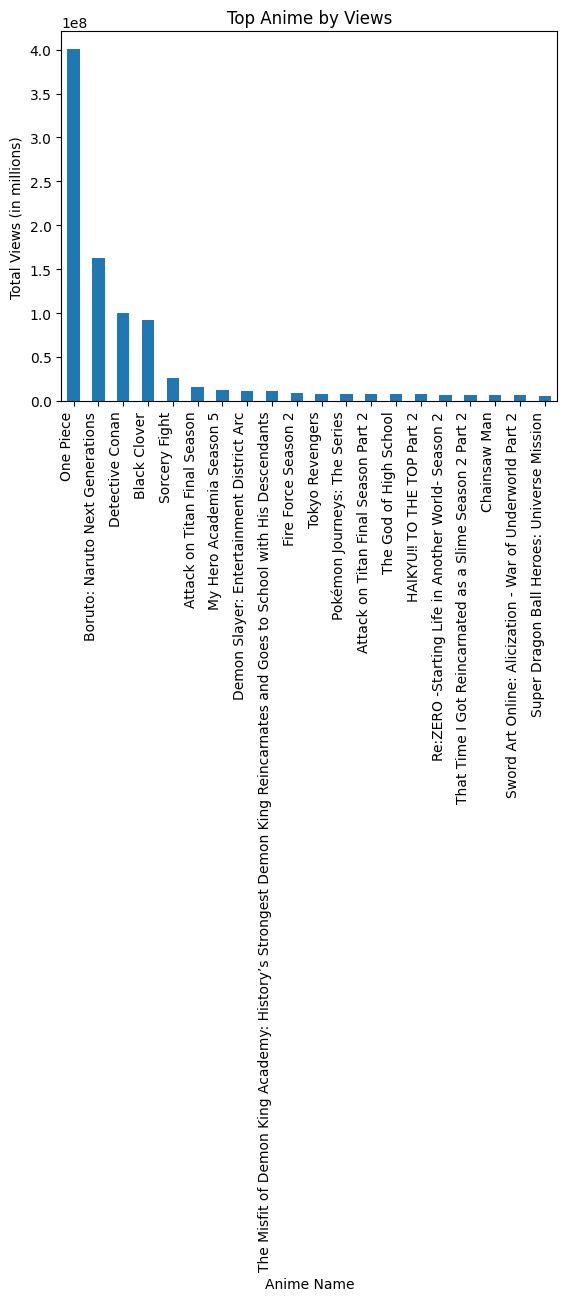

In [77]:
anime_views = dff.groupby('Anime Name')['Views'].sum().sort_values(ascending=False)[:20]

# Create bar chart
anime_views.plot(kind='bar')
plt.title('Top Anime by Views')
plt.xlabel('Anime Name')
plt.ylabel('Total Views (in millions)')
plt.xticks(rotation=90, ha='right')
plt.show()

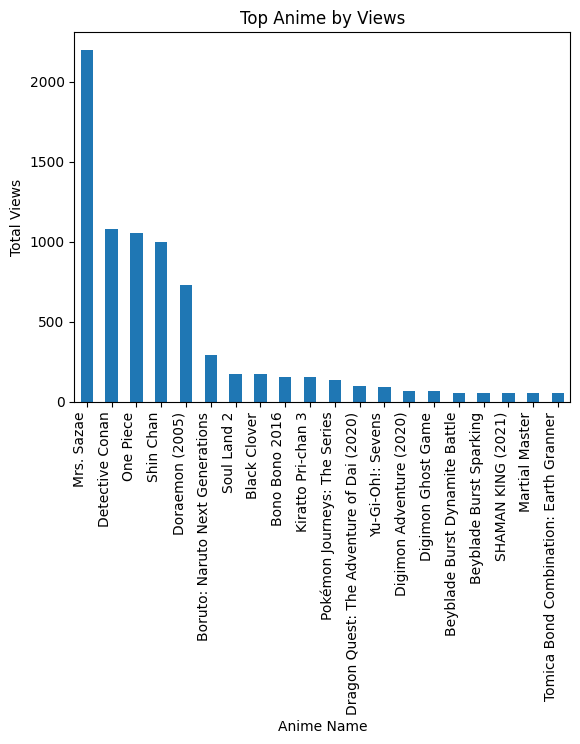

In [79]:
anime_views = dff.groupby('Anime Name')['Latest Episode'].sum().sort_values(ascending=False)[:20]

# Create bar chart
anime_views.plot(kind='bar')
plt.title('Top Anime by Views')
plt.xlabel('Anime Name')
plt.ylabel('Total Views')
plt.xticks(rotation=90, ha='right')
plt.show()